**PCA Demo 
Authors: Aditya Lahiri, Shirish Pandagare** 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Load the wine data from scikit learn**

In [0]:
from sklearn.datasets import load_wine
wine = load_wine()


**Display the wine dataset**
**Objective: Classify wine into 3 categories**

In [232]:
df =  pd.DataFrame(np.c_[wine['data'], wine['target']],
                  columns= np.append(wine['feature_names'], ['target']))
df.head(150) # 178 by 14 


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0.0


**Split the dataset into training (75%)and test set (25%)**

---



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=100)

**Scale the training and testing dataset, in order to get proper projections of the data**

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)# Scale train data
X_test = sc.transform(x_test)# scale test data

**Transform the training and test set to the new PCA axis, also specify the number of components**

In [236]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # use None # use 2
X_train_pca = pca.fit_transform(X_train) # PCA Transform training set with n_components features
X_test_pca = pca.transform(X_test)# PCA Transform the testing set
explained_variance = pca.explained_variance_ratio_
print(explained_variance)# Get the explained variance
print(np.sum(explained_variance))# Total variance explained


[0.3558185  0.20697208]
0.5627905819960791


**Plot the variance explained by each of the PCs**

Text(0.5,1,'Plot of variance explained by PCs ')

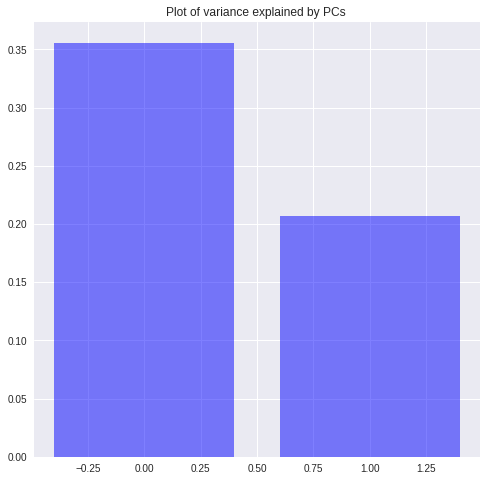

In [237]:
cum_sum=pca.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(explained_variance.size), explained_variance, color = 'b',alpha=0.5)
plt.title("Plot of variance explained by PCs ")

**Classify using Logistic Regression**

In [238]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state = 0)
clf.fit(x_train,y_train)

classifier_pca = LogisticRegression(random_state = 0)
classifier_pca.fit(X_train_pca, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Predict the test label**

In [0]:
y_pred=clf.predict(X_test)
y_pred_pca = classifier_pca.predict(X_test_pca)

**Construct a confusion matrix for simple logistic regression classifier**

In [240]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 5  5  0]
 [ 1 11  5]
 [ 0  0 18]]


**Construct a confusion matrix for logistic regression classifier with PCA **

In [241]:
from sklearn.metrics import confusion_matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)
print(cm_pca)

[[10  0  0]
 [ 1 16  0]
 [ 0  0 18]]


**Visual representation of test data classification on the two PC axis**

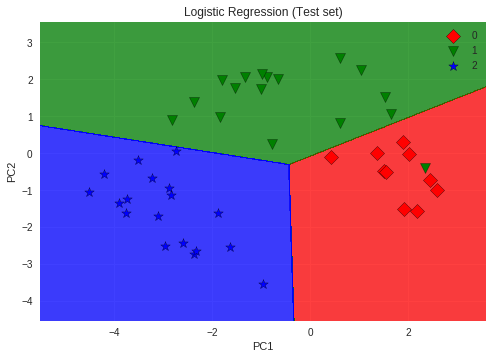

In [242]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75,cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
markers=['D','v','*']
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=100,marker=markers[j],edgecolors='k',
                c = ListedColormap(('red','green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()